In [11]:
# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

# 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
# 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
# 3 age - student's age (numeric: from 15 to 22) 
# 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
# 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
# 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
# 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
# 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
# 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
# 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
# 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
# 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
# 16 schoolsup - extra educational support (binary: yes or no) 
# 17 famsup - family educational support (binary: yes or no) 
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
# 19 activities - extra-curricular activities (binary: yes or no) 
# 20 nursery - attended nursery school (binary: yes or no) 
# 21 higher - wants to take higher education (binary: yes or no) 
# 22 internet - Internet access at home (binary: yes or no) 
# 23 romantic - with a romantic relationship (binary: yes or no) 
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
# 30 absences - number of school absences (numeric: from 0 to 93) 

# # these grades are related with the course subject, Math or Portuguese: 
# 31 G1 - first period grade (numeric: from 0 to 20) 
# 31 G2 - second period grade (numeric: from 0 to 20) 
# 32 G3 - final grade (numeric: from 0 to 20, output target)

0.6708860759493671
0.8459167950693375


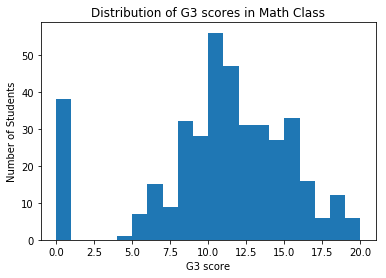

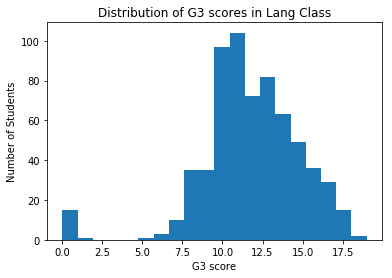

In [12]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

#importing data
df_math = pd.read_csv('data/student-mat.csv',delimiter = ';',header=0)
df_lang = pd.read_csv('data/student-por.csv',delimiter= ';',header=0)

#creating pass/fail column for G3 scores >= 10
#These columns will act as our labels 1 for pass 0 for fail
y_math = [1 if i >= 10 else 0 for i in df_math['G3']]
y_lang = [1 if i >= 10 else 0 for i in df_lang['G3']]

print np.sum(y_math) / float(len(y_math))
print np.sum(y_lang) / float(len(y_lang))


#turning lists into series for later manipulation
y_math = pd.Series(y_math)
y_lang = pd.Series(y_lang)

#remove the G1, G2, and G3 columns from the original df's to create df with feature data only
#it was noted that G1 and G2 scores were very good indicators of G3 scores but we want to be able to predict performance without any testing data
df_math_X_no_dummy = df_math.drop(['G1','G2','G3'], axis = 1)
df_lang_X_no_dummy = df_lang.drop(['G1','G2','G3'], axis = 1)

#create dummy variables for features like Gender and drop the first dummy column to elimintae duplicates in data
df_math_X = pd.get_dummies(df_math_X_no_dummy, drop_first = True)
df_lang_X = pd.get_dummies(df_lang_X_no_dummy, drop_first = True)



#plotting distribution of G3 scores
plt.figure()
_ = df_math['G3'].plot.hist(bins=20)
_ = plt.xlabel('G3 score')
_ = plt.ylabel('Number of Students')
_ = plt.title('Distribution of G3 scores in Math Class')
plt.figure()
df_lang['G3'].plot.hist(bins=20)
_ = plt.xlabel('G3 score')
_ = plt.ylabel('Number of Students')
_ = plt.title('Distribution of G3 scores in Lang Class')

plt.show()

In [24]:
#copied code for plotting confusion matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    
    


265
549
395


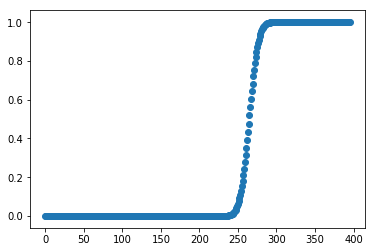

In [20]:
#Binomial CDF for Test scores
print y_math.sum()
print y_lang.sum()
print len(y_math)

def binomcdf(df): 
    n = len(df)
    p = df.sum() / float(n)   
    y = []
    for i in range(n):
        bi = stats.binom.cdf(i, n, p)
        y.append(bi)
          
    last = stats.binom.cdf(n, n, p)     
    y.append(last)
    x = np.arange(0,n+1,1)
    plt.scatter(x, y)
    plt.show()

binomcdf(y_math)

In [21]:
#Correlation values for each variable compared to the pass/fail coulmn

#'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'


#turning lists into series for later manipulation .astype(bool)
y_math = pd.Series(y_math)

y_lang = pd.Series(y_lang)



#remove the G3 column from the original df's to create df with feature data only
df_math_X = df_math.drop(['G1','G2','G3'], axis = 1)
df_lang_X = df_lang.drop(['G1','G2','G3'], axis = 1)

#create dummy variables for features like Gender and drop the first dummy column to elimintae duplicates in data
df_math_X = pd.get_dummies(df_math_X, drop_first = True)
df_lang_X = pd.get_dummies(df_lang_X, drop_first = True)


#correlation functions for math and lang calss data set
def corr(df,y,class_name = 'course'):
    feature_name = []
    corr_array = []
    for i in list(df):
        corr = df[i].corr(y)
        feature_name.append(i)
        corr_array.append(corr)
    
    abs_corr = np.absolute(corr_array)
    df_corr = pd.DataFrame({'correlation':corr_array, 'absolute_correlation':abs_corr}, index = feature_name)
    return df_corr

#MATH and LANG CLASS CORRELATIONS
math_correlations = corr(df_math_X, y_math, 'math')
lang_correlations = corr(df_lang_X, y_lang, 'math')

print 'math class'
print math_correlations.sort_values('absolute_correlation', ascending = False).head()
print
print 'language class'
print lang_correlations.sort_values('absolute_correlation', ascending = False).head()


# for m in math_correlations.keys():
#     print 'Correlation',m,' and passing for math and lang are: ', "{0:.3f}".format(math_correlations[m]),',',"{0:.3f}".format(lang_correlations[m])  

# plt.figure()
# pd.scatter_matrix(df_math_X.iloc[:10], y_math, figsize=[12,12], s = 150, marker = 'D')
# plt.show()


math class
            absolute_correlation  correlation
failures                0.337731    -0.337731
goout                   0.183399    -0.183399
age                     0.179645    -0.179645
higher_yes              0.157708     0.157708
Medu                    0.115396     0.115396

language class
            absolute_correlation  correlation
failures                0.380237    -0.380237
higher_yes              0.309708     0.309708
school_MS               0.297217    -0.297217
studytime               0.165111     0.165111
Fedu                    0.146249     0.146249


In [16]:
# plt.figure()
# pd.plotting.scatter_matrix(df_math_X, c = y_math, figsize=[12,12], s = 150, marker = 'D')
# plt.show()


# Basic RandomForest

## Math Class

In [22]:
#MATH CLASS MODEL 

# create calssifier
forest = RandomForestClassifier(n_estimators = 10)

# split data into training and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(df_math_X,y_math,test_size = 0.3, random_state = 21, stratify = y_math)

#fit classifier to math and lang training data
forest_m = forest.fit(X_train_m,y_train_m)
train_score_rf_m = forest_m.score(X_train_m,y_train_m)
print "math RF training score: ",train_score_rf_m
#predict y outcomes based on X testing data
#also return a score on how well model did
y_pred_rf_m = forest_m.predict(X_test_m)
model_score_rf_m = forest_m.score(X_test_m,y_test_m)
print "math RF test score: ",model_score_rf_m



math RF training score:  1.0
math RF test score:  0.6302521008403361


Confusion matrix, without normalization
[[12 27]
 [17 63]]
Normalized confusion matrix
[[0.31 0.69]
 [0.21 0.79]]


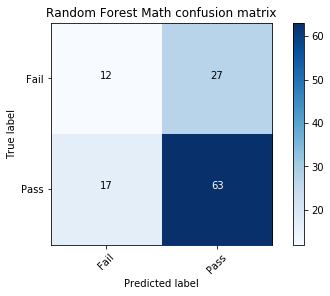

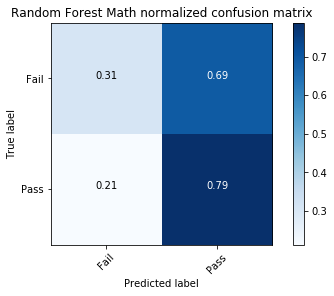

             precision    recall  f1-score   support

       Fail       0.41      0.31      0.35        39
       Pass       0.70      0.79      0.74        80

avg / total       0.61      0.63      0.61       119



In [29]:
#Model scoring metrics and confusion matrix presented below

clf_rep = metrics.precision_recall_fscore_support(y_test_m, y_pred_rf_m)

out_dict = {
             "precision" :clf_rep[0].round(2)
            ,"recall" : clf_rep[1].round(2)
            ,"f1-score" : clf_rep[2].round(2)
            ,"support" : clf_rep[3]
            }
out_df = pd.DataFrame(out_dict, index = target_names)



#confusion matrix and necessary plot variables
cm_m = confusion_matrix(y_test_m, y_pred_rf_m)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m, classes=target_names,
                      title='Random Forest Math confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m, classes=target_names, normalize=True,
                      title='Random Forest Math normalized confusion matrix')


plt.show()

math_forest_report = classification_report(y_test_m, y_pred_rf_m, target_names = target_names)
print math_forest_report

## Lang Class

In [30]:
#LANG CLASS MODEL

# create calssifier
forest = RandomForestClassifier(n_estimators = 10)

# split data into training and test sets
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df_lang_X,y_lang,test_size = 0.3, random_state = 21, stratify = y_lang)

#fit classifier to math and lang training data
forest_l = forest.fit(X_train_l,y_train_l)

#predict y outcomes based on X testing data
#also return a score on how well model did
y_pred_rf_l = forest_l.predict(X_test_l)
train_score_rf_l = forest_l.score(X_train_l,y_train_l)
print "lang RF training score: ", train_score_rf_l
model_score_rf_l = forest_l.score(X_test_l,y_test_l)
print "lang RF test score: ", model_score_rf_l



lang RF training score:  0.9933920704845814
lang RF test score:  0.8358974358974359


Confusion matrix, without normalization
[[  9  21]
 [ 11 154]]
Normalized confusion matrix
[[0.3  0.7 ]
 [0.07 0.93]]


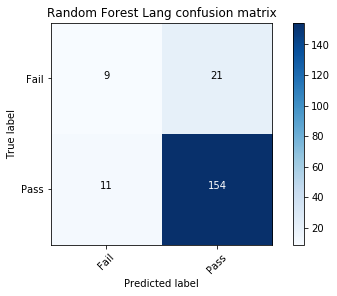

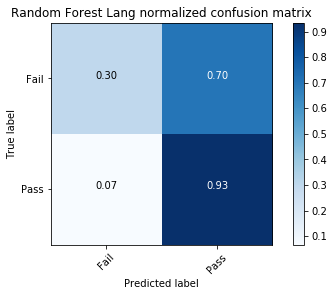

             precision    recall  f1-score   support

       Fail       0.45      0.30      0.36        30
       Pass       0.88      0.93      0.91       165

avg / total       0.81      0.84      0.82       195



In [32]:
#confusion matrix plot function
cm_l = confusion_matrix(y_test_l, y_pred_rf_l)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_l, classes=target_names,
                      title='Random Forest Lang confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_l, classes=target_names, normalize=True,
                      title='Random Forest Lang normalized confusion matrix')

plt.show()

lang_forest_report = classification_report(y_test_l, y_pred_rf_l, target_names = target_names)
print lang_forest_report

# SMOTETomek models




In [33]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek(ratio = 'minority', random_state = 16)

## Math Class


In [35]:
X_train_smto_m, y_train_smto_m = smto.fit_sample(X_train_m,y_train_m)

smto_forest_m = forest.fit(X_train_smto_m, y_train_smto_m)

train_score_rf_smto_m = smto_forest_m.score(X_train_smto_m, y_train_smto_m)
print "math RF SMOTETomek train score: ", train_score_rf_smto_m

y_pred_rf_smto_m = smto_forest_m.predict(X_test_m)
model_score_rf_smto_m = smto_forest_m.score(X_test_m ,y_test_m)
print "math RF SMOTETomek test score: ",model_score_rf_smto_m


math RF SMOTETomek train score:  0.9944444444444445
math RF SMOTETomek test score:  0.6554621848739496


Confusion matrix, without normalization
[[17 22]
 [19 61]]
Normalized confusion matrix
[[0.44 0.56]
 [0.24 0.76]]


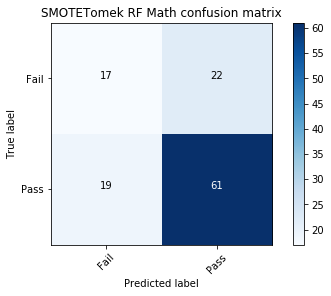

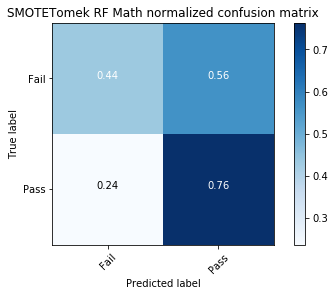

             precision    recall  f1-score   support

       Fail       0.47      0.44      0.45        39
       Pass       0.73      0.76      0.75        80

avg / total       0.65      0.66      0.65       119



In [37]:
#confusion matrix and necessary plot variables
cm_m_smto = confusion_matrix(y_test_m, y_pred_rf_smto_m)
np.set_printoptions(precision=2)
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m_smto, classes=target_names,
                      title='SMOTETomek RF Math confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m_smto, classes=target_names, normalize=True,
                      title='SMOTETomek RF Math normalized confusion matrix')


plt.show()

math_smto_forest_report = classification_report(y_test_m, y_pred_rf_smto_m, target_names = target_names)

print math_smto_forest_report

## Lang Class

In [38]:
X_train_smto_l, y_train_smto_l = smto.fit_sample(X_train_l,y_train_l)

smto_forest_l = forest.fit(X_train_smto_l, y_train_smto_l)

train_score_rf_smto_l = smto_forest_l.score(X_train_smto_l, y_train_smto_l)
print "lang RF SMOTETomek train score: ", train_score_rf_smto_l

y_pred_rf_smto_l = smto_forest_l.predict(X_test_l)
model_score_rf_smto_l = smto_forest_l.score(X_test_l,y_test_l)
print "lang RF SMOTETomek test score: ",model_score_rf_smto_l

lang RF SMOTETomek train score:  0.99609375
lang RF SMOTETomek test score:  0.8512820512820513


Confusion matrix, without normalization
[[ 12  18]
 [ 11 154]]
Normalized confusion matrix
[[0.4  0.6 ]
 [0.07 0.93]]


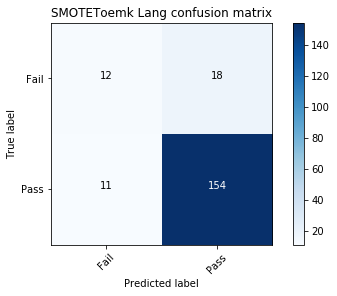

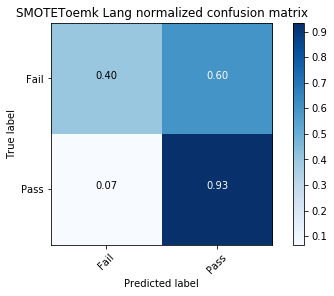

             precision    recall  f1-score   support

       Fail       0.52      0.40      0.45        30
       Pass       0.90      0.93      0.91       165

avg / total       0.84      0.85      0.84       195



In [39]:
#confusion matrix plot function
cm_l_smto = confusion_matrix(y_test_l, y_pred_rf_smto_l)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_l_smto, classes=target_names,
                      title='SMOTEToemk Lang confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_l_smto, classes=target_names, normalize=True,
                      title='SMOTEToemk Lang normalized confusion matrix')


plt.show()


lang_smto_forest_report = classification_report(y_test_l, y_pred_rf_smto_l, target_names = target_names)

print lang_smto_forest_report

# GridSearchCV RandomForest models

In [40]:
#parameters
param_grid = {'n_estimators':[5,10,15,20],'max_depth': [5,10,15,20],'criterion': ['gini','entropy'],'min_samples_split':[5,10,15,20]}


# Math with CV and Hyperparameter Tuning


In [41]:

rf_math_final = RandomForestClassifier()

rf_math_final_cv = GridSearchCV(rf_math_final,param_grid,cv=5, scoring='roc_auc')

rf_math_final_cv.fit(X_train_smto_m, y_train_smto_m)

print rf_math_final_cv.best_params_
print rf_math_final_cv.best_score_

y_pred_final_m = rf_math_final_cv.predict(X_test_m)

math_final_score = rf_math_final_cv.score(X_test_m,y_test_m)
print math_final_score


{'min_samples_split': 20, 'n_estimators': 15, 'criterion': 'gini', 'max_depth': 10}
0.9044753086419752
0.6788461538461538


Confusion matrix, without normalization
[[18 21]
 [14 66]]
Normalized confusion matrix
[[0.46 0.54]
 [0.17 0.82]]


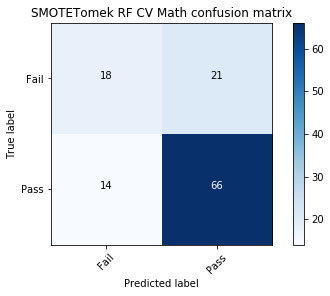

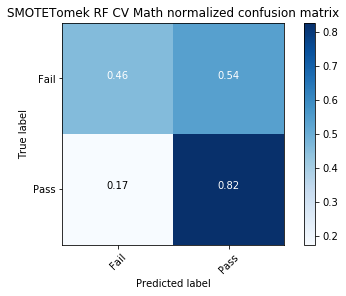

             precision    recall  f1-score   support

       Fail       0.56      0.46      0.51        39
       Pass       0.76      0.82      0.79        80

avg / total       0.69      0.71      0.70       119



In [43]:
#confusion matrix plot function
cm_m_final = confusion_matrix(y_test_m, y_pred_final_m)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_m_final, classes=target_names,
                      title='SMOTETomek RF CV Math confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m_final, classes=target_names, normalize=True,
                      title='SMOTETomek RF CV Math normalized confusion matrix')


plt.show()


math_final_report = classification_report(y_test_m, y_pred_final_m, target_names = target_names)

print math_final_report

# Lang with CV and Hyperparameter Tuning

In [44]:
rf_lang_final = RandomForestClassifier()

rf_lang_final_cv = GridSearchCV(rf_lang_final,param_grid,cv=5, scoring='roc_auc')

rf_lang_final_cv.fit(X_train_smto_l, y_train_smto_l)

print rf_lang_final_cv.best_params_
print rf_lang_final_cv.best_score_

y_pred_final_l = rf_math_final_cv.predict(X_test_l)


lang_final_score = rf_math_final_cv.score(X_test_l,y_test_l)
print lang_final_score


{'min_samples_split': 15, 'n_estimators': 20, 'criterion': 'gini', 'max_depth': 15}
0.9788271281897926
0.655959595959596


Confusion matrix, without normalization
[[ 11  19]
 [ 43 122]]
Normalized confusion matrix
[[0.37 0.63]
 [0.26 0.74]]


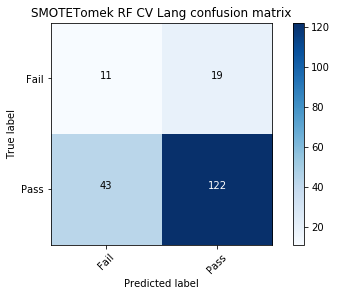

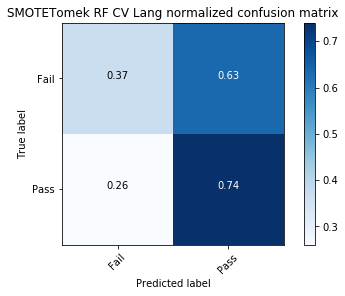

             precision    recall  f1-score   support

       Fail       0.20      0.37      0.26        30
       Pass       0.87      0.74      0.80       165

avg / total       0.76      0.68      0.72       195



In [45]:
#confusion matrix plot function
cm_l_final = confusion_matrix(y_test_l, y_pred_final_l)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_l_final, classes=target_names,
                      title='SMOTETomek RF CV Lang confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_l_final, classes=target_names, normalize=True,
                      title='SMOTETomek RF CV Lang normalized confusion matrix')


plt.show()


lang_final_report = classification_report(y_test_l, y_pred_final_l, target_names = target_names)

print lang_final_report

# CatBoost Models

In [56]:
from catboost import CatBoostClassifier
from catboost import FeaturesData
cat = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')
param_grid_cat = {'iterations':[2,3,4,5,6],'learning_rate':[1,3,5,7,9], 'depth':[2,4,6,8,10]}

cat_cv = GridSearchCV(cat,param_grid_cat,cv=5, scoring='roc_auc')

#getting cat features
cat_features = df_math_X_no_dummy.values.get_feature_names()
print cat_features

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names'

## Math Class

In [51]:
#setting up training and test sets and resampling with smotetomek
# X_train_cat_m, y_train_cat_m, X_test_cat_m, y_test_cat_m = train_test_split(df_math_X_no_dummy,y_math,test_size = 0.3, random_state = 21, stratify = y_math)
# X_train_cat_smto_m, y_train_cat_smto_m = smto.fit_sample(X_train_cat_m,y_train_cat_m)



cat_math = cat_cv.fit(df_math_X_no_dummy, y_math, categorical_features_indices)
# Get predicted classes
y_pred_cat_m = cat_math.predict(X_test_cat_m)
# Get predicted probabilities for each class
preds_proba = cat_math.predict_proba(X_test_cat_m)
# Get predicted RawFormulaVal
preds_raw = cat_math.predict(X_test_cat_m, prediction_type='RawFormulaVal')
print preds_raw

cat_math.eval_metrics(['Precision','Recall','F1','Accuracy', 'AUC'])

ValueError: could not convert string to float: no

In [ ]:
#confusion matrix plot function
cm_cat_m = confusion_matrix(y_test_cat_m, y_pred_cat_m)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_cat_m, classes=target_names,
                      title='CatBoost Math confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_cat_m, classes=target_names, normalize=True,
                      title='CatBoost Math normalized confusion matrix')


plt.show()


cat_math_report = classification_report(y_test_cat_m, y_pred_cat_m, target_names = target_names)

print cat_math_report

## Lang Class

In [ ]:
#setting up training and test sets and resampling with smotetomek
X_train_cat_l, y_train_cat_l, X_test_cat_l, y_test_cat_l = train_test_split(df_lang_X_no_dummy,y_lang,test_size = 0.3, random_state = 21, stratify = y_lang)
X_train_cat_smto_l, y_train_cat_smto_l = smto.fit_sample(X_train_cat_l,y_train_cat_l)

#Getting the features thast are categorical in nature
categorical_features_indices_l = np.where(X_train_cat_smto_l.dtypes != np.float)[0]


cat_math = cat_cv.fit(X_train_cat_smto_l, y_train_cat_smto_l, categorical_features_indices_l)
# Get predicted classes
y_pred_cat_m = cat_math.predict(X_test_cat_l)
# Get predicted probabilities for each class
preds_proba = cat_math.predict_proba(X_test_cat_l)
# Get predicted RawFormulaVal
preds_raw = cat_math.predict(X_test_cat_l, prediction_type='RawFormulaVal')
print preds_raw

cat_math_score = cat_math.score(X_test_cat_l,y_test_cat_l)
print cat_math_score

In [ ]:
#confusion matrix plot function
cm_cat_m = confusion_matrix(y_test_cat_m, y_pred_cat_m)
target_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_cat_m, classes=target_names,
                      title='CatBoost Lang confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_cat_m, classes=target_names, normalize=True,
                      title='CatBoost Lang normalized confusion matrix')


plt.show()


cat_lang_report = classification_report(y_test_cat_l, y_pred_cat_l, target_names = target_names)

print cat_lang_report